In [16]:
# permet l'affchage des graphiques dans la continuité du code,
# et non dans une fenêtre à part
%matplotlib inline

# importations
from random import randint
from enum import Enum
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# definition d'une classe Strategy afin d'organiser la récupération
# des résultats obtenus
# CHANGE (changer de porte) = 1 et KEEP (garder la porte de départ) = 0
class Strategy(Enum):
    CHANGE = 1
    KEEP = 0

In [3]:
# Fonction play_game
# Simule une partie
def play_game(strategy):
    doors = [0, 1, 2]
    right_door = randint(0, 2)
    first_choice = randint(0, 2)
    
    doors.remove(first_choice)
    if (first_choice == right_door):
        doors.remove(doors[randint(0, 1)])
    else:
        doors = [right_door]
    
    second_choice = 0
    
    if (strategy == Strategy.KEEP):
        second_choice = first_choice
    else:
        second_choice = doors[0]
    
    return second_choice == right_door

In [4]:
print("If we keep the same door :")
for i in range(0,10):
    print(play_game(Strategy.KEEP))
print("If we change the door :")
for i in range(0, 10):
    print(play_game(Strategy.CHANGE))

If we keep the same door :
False
False
True
False
False
False
True
False
True
False
If we change the door :
True
True
False
True
False
True
True
False
True
True


In [5]:
def play(strategy, itr):
    return [1 if play_game(strategy) else 0 for i in range(itr)]

In [6]:
sum(play(Strategy.KEEP, 1000))

335

In [7]:
sum (play(Strategy.CHANGE, 1000))

665

<BarContainer object of 2 artists>

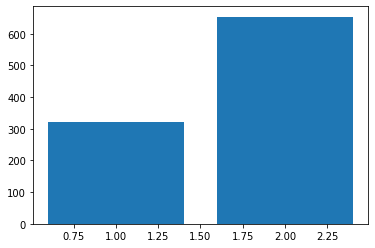

In [22]:
plt.bar( [1,2], [sum(play(Strategy.KEEP, 1000)), sum (play(Strategy.CHANGE, 1000))] )

In [9]:
win_change = []
win_keep = []
samples = [1000, 10000, 20000, 50000, 80000, 100000]
for turns in samples:
    win_change.append(play(Strategy.CHANGE, turns))
    win_keep.append(play(Strategy.KEEP, turns))

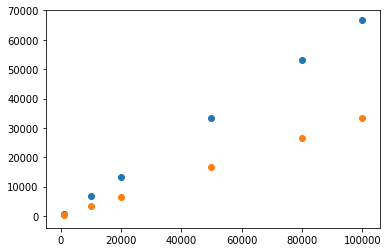

In [10]:
figure = plt.figure()
plot = plt.scatter(samples, [sum(x) for x in win_change])
plot = plt.scatter(samples, [sum(x) for x in win_keep])

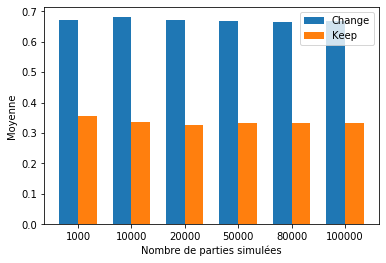

In [27]:
X_change_mean = [np.mean(x) for x in win_change]
X_keep_mean = [np.mean(x) for x in win_keep]

labels = ["1000", "10000", "20000", "50000", "80000", "100000"]
x = np.arange(len(labels))
width = 0.35

figure, ax = plt.subplots()
bar1 = ax.bar(x - width/2, X_change_mean, width, label='Change')
bar2 = ax.bar(x + width/2, X_keep_mean, width, label='Keep')

ax.set_ylabel('Moyenne')
ax.set_xlabel('Nombre de parties simulées')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()